In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
flight_price_df=pd.read_csv(r"C:\Users\BAPS\Desktop\Python\Datasets\Clean_Dataset.csv")

In [3]:
flight_price_df.head()

,Serial_Number,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
flight_price_df.info()
# OBSERVATION   -> There are 300153 records and 12 columns
# columns ['airline', 'flight', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class'] are object datatypes
# columns ['Serial_Number', 'duration', 'days_left', 'price'] are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial_Number     300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
flight_price_df.select_dtypes(include='number').columns

Index(['Serial_Number', 'duration', 'days_left', 'price'], dtype='object')

In [7]:
flight_price_df.select_dtypes(include=['object']).columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [8]:
total_missing = flight_price_df.isnull().sum()
percentage_missing = total_missing * 100 / len(flight_price_df)
missing_value_df = pd.DataFrame(data=[total_missing, percentage_missing], index=["Total", "%"]).T
missing_value_df

,Total,%
Serial_Number,0.0,0.0
airline,0.0,0.0
flight,0.0,0.0
source_city,0.0,0.0
departure_time,0.0,0.0
stops,0.0,0.0
arrival_time,0.0,0.0
destination_city,0.0,0.0
class,0.0,0.0
duration,0.0,0.0


In [9]:
flight_price_df_o=flight_price_df

In [9]:
flight_price_df.drop(['Serial_Number',"flight"],axis=1,inplace=True)

# Univariante Analysis

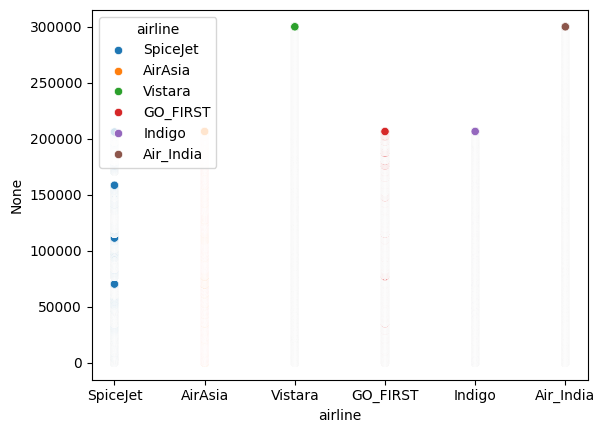

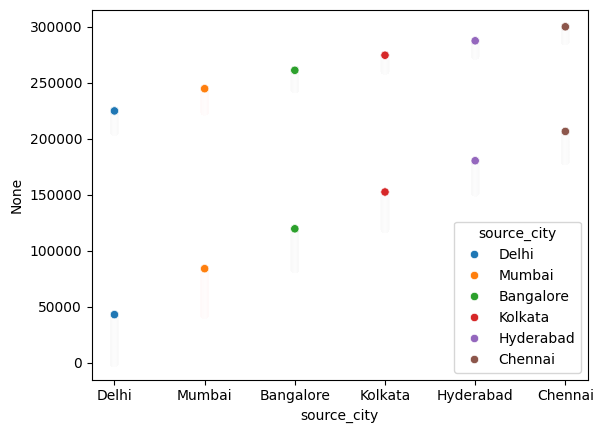

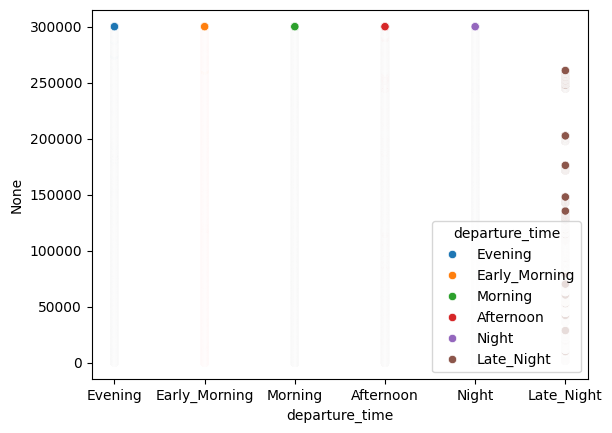

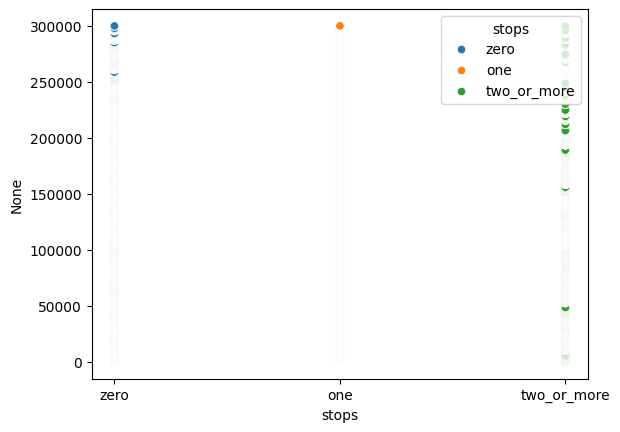

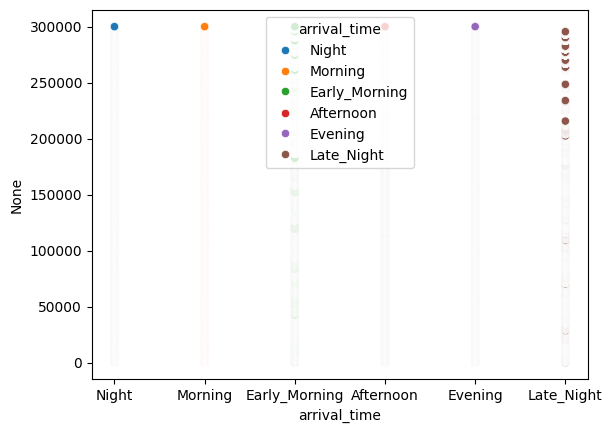

In [ ]:
for col in flight_price_df.columns:
    plt.figure()
    sns.scatterplot(x=flight_price_df[col],data=flight_price_df,y=flight_price_df.index,hue=col)

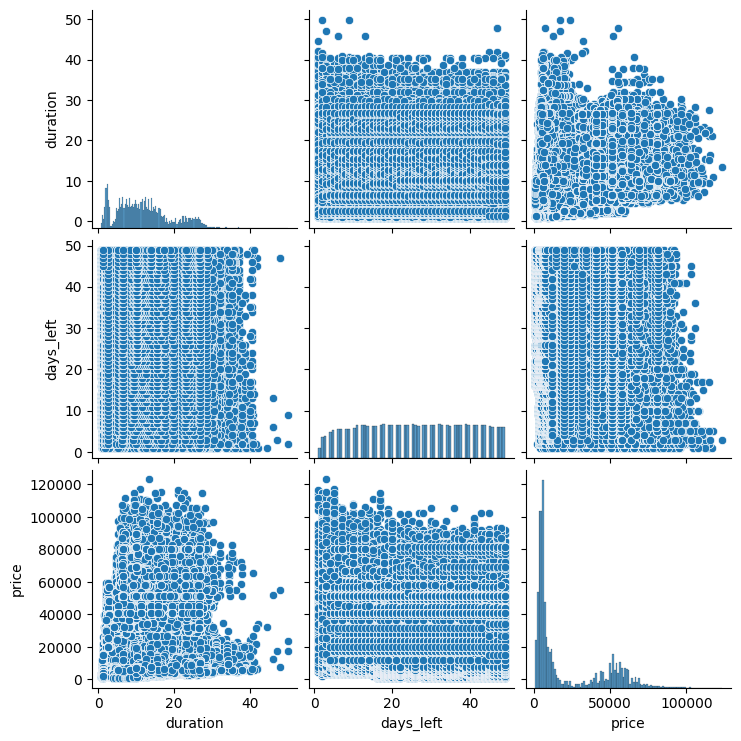

In [ ]:
sns.pairplot(flight_price_df)

In [ ]:
encoder=LabelEncoder()

In [ ]:
flight_price_df["class"].unique()

array(['Economy', 'Business'], dtype=object)

In [ ]:
flight_price_df['airline']=encoder.fit_transform(flight_price_df['airline'])
flight_price_df["class"]=encoder.fit_transform(flight_price_df["class"])

In [ ]:
flight_price_df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [ ]:
flight_price_df['destination_city']=encoder.fit_transform(flight_price_df["destination_city"])

In [ ]:
flight_price_df["source_city"]=encoder.fit_transform(flight_price_df["source_city"])

In [ ]:
flight_price_df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [ ]:
flight_price_df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,Evening,zero,Night,5,1,2.17,1,5953
1,4,2,Early_Morning,zero,Morning,5,1,2.33,1,5953
2,0,2,Early_Morning,zero,Early_Morning,5,1,2.17,1,5956
3,5,2,Morning,zero,Afternoon,5,1,2.25,1,5955
4,5,2,Morning,zero,Morning,5,1,2.33,1,5955


In [ ]:
flight_price_df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [ ]:
flight_price_df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,Evening,zero,Night,5,1,2.17,1,5953
1,4,2,Early_Morning,zero,Morning,5,1,2.33,1,5953
2,0,2,Early_Morning,zero,Early_Morning,5,1,2.17,1,5956
3,5,2,Morning,zero,Afternoon,5,1,2.25,1,5955
4,5,2,Morning,zero,Morning,5,1,2.33,1,5955


In [ ]:
flight_price_df["stops"].replace('zero',0,inplace=True)
flight_price_df["stops"].replace('one',1,inplace=True)
flight_price_df["stops"].replace('two_or_more',2,inplace=True)

C:\Users\BAPS\AppData\Local\Temp\ipykernel_11928\1104153604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flight_price_df["stops"].replace('zero',0,inplace=True)
C:\Users\BAPS\AppData\Local\Temp\ipykernel_11928\1104153604.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [ ]:
flight_price_df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,Evening,0,Night,5,1,2.17,1,5953
1,4,2,Early_Morning,0,Morning,5,1,2.33,1,5953
2,0,2,Early_Morning,0,Early_Morning,5,1,2.17,1,5956
3,5,2,Morning,0,Afternoon,5,1,2.25,1,5955
4,5,2,Morning,0,Morning,5,1,2.33,1,5955


In [ ]:
flight_price_df["departure_time"].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [ ]:
flight_price_df["departure_time"].replace("Early_Morning",0,inplace=True)
flight_price_df["departure_time"].replace("Morning",1,inplace=True)
flight_price_df["departure_time"].replace('Afternoon',2,inplace=True)
flight_price_df["departure_time"].replace('Evening',3,inplace=True)
flight_price_df["departure_time"].replace('Night',4,inplace=True)
flight_price_df["departure_time"].replace('Late_Night',5,inplace=True)

C:\Users\BAPS\AppData\Local\Temp\ipykernel_11928\2965646803.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flight_price_df["departure_time"].replace("Early_Morning",0,inplace=True)
C:\Users\BAPS\AppData\Local\Temp\ipykernel_11928\2965646803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [ ]:
flight_price_df["arrival_time"].replace("Early_Morning",0,inplace=True)
flight_price_df["arrival_time"].replace("Morning",1,inplace=True)
flight_price_df["arrival_time"].replace('Afternoon',2,inplace=True)
flight_price_df["arrival_time"].replace('Evening',3,inplace=True)
flight_price_df["arrival_time"].replace('Night',4,inplace=True)
flight_price_df["arrival_time"].replace('Late_Night',5,inplace=True)

C:\Users\BAPS\AppData\Local\Temp\ipykernel_11928\3730255667.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flight_price_df["arrival_time"].replace("Early_Morning",0,inplace=True)
C:\Users\BAPS\AppData\Local\Temp\ipykernel_11928\3730255667.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [ ]:
# flight_price_df["flight_number"]=flight_price_df['flight'].str.split('-').str[1]

In [ ]:
flight_price_df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,3,0,4,5,1,2.17,1,5953
1,4,2,0,0,1,5,1,2.33,1,5953
2,0,2,0,0,0,5,1,2.17,1,5956
3,5,2,1,0,2,5,1,2.25,1,5955
4,5,2,1,0,1,5,1,2.33,1,5955


In [ ]:
# flight_price_df['flight_number'].value_counts()

In [ ]:
flight_price_df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,3,0,4,5,1,2.17,1,5953
1,4,2,0,0,1,5,1,2.33,1,5953
2,0,2,0,0,0,5,1,2.17,1,5956
3,5,2,1,0,2,5,1,2.25,1,5955
4,5,2,1,0,1,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,1,1,3,3,0,10.08,49,69265
300149,5,1,2,1,4,3,0,10.42,49,77105
300150,5,1,0,1,4,3,0,13.83,49,79099
300151,5,1,0,1,3,3,0,10.00,49,81585


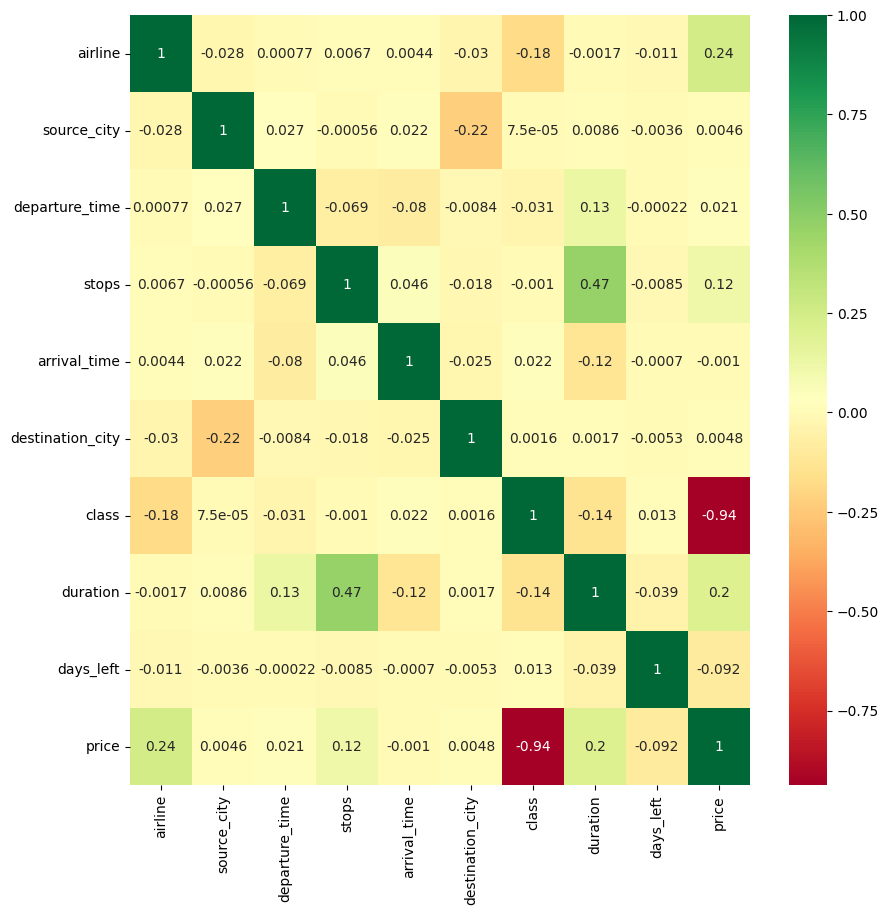

In [ ]:
corr=flight_price_df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

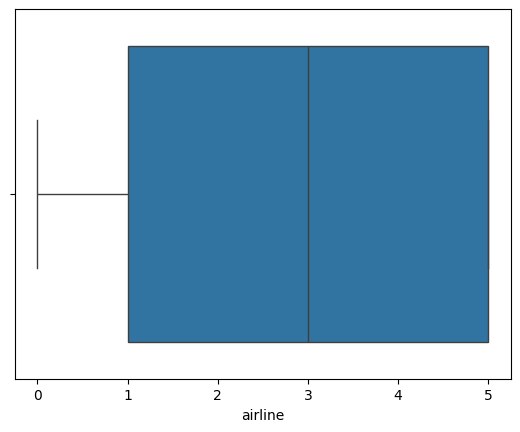

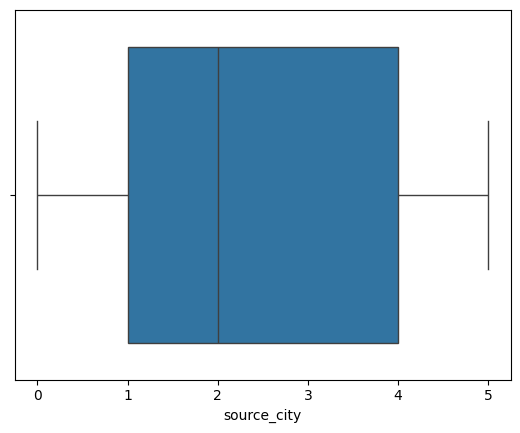

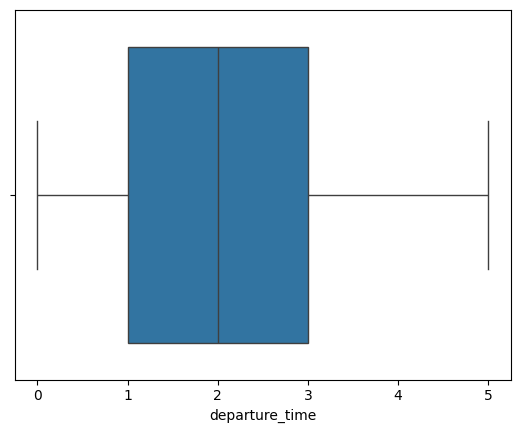

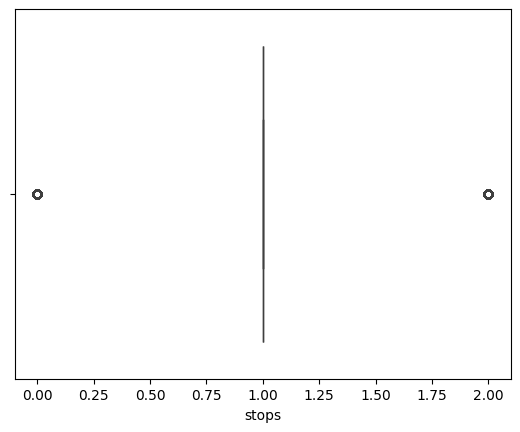

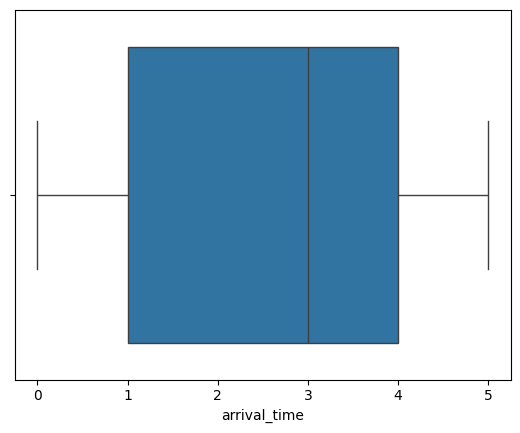

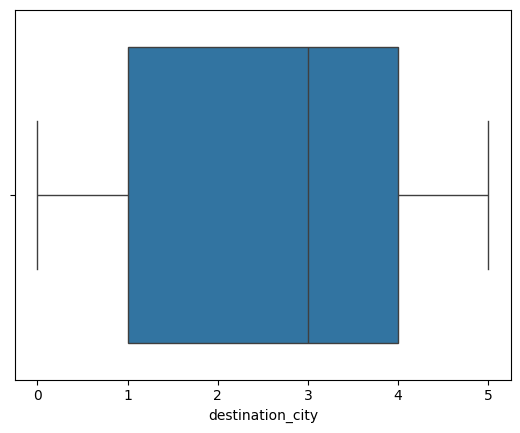

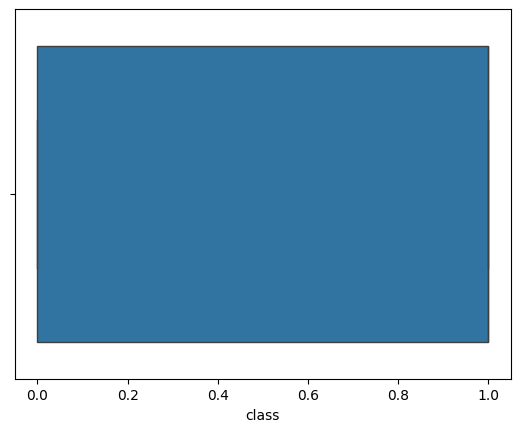

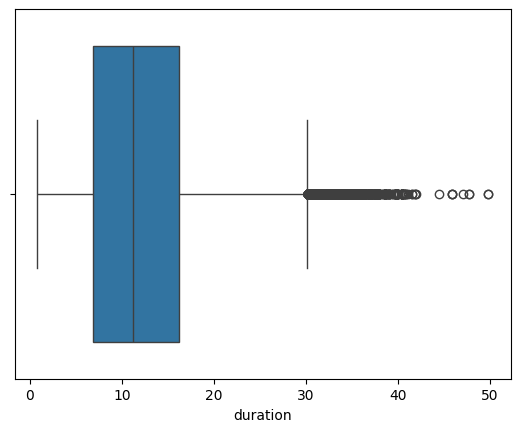

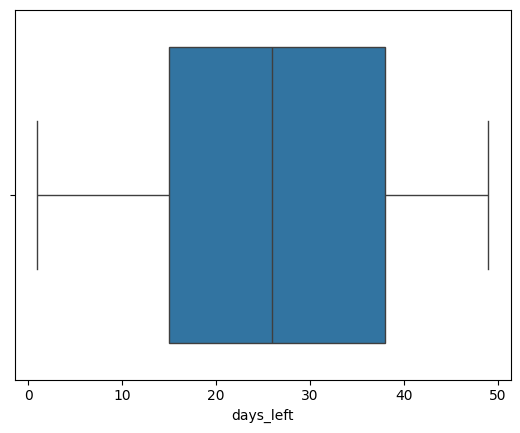

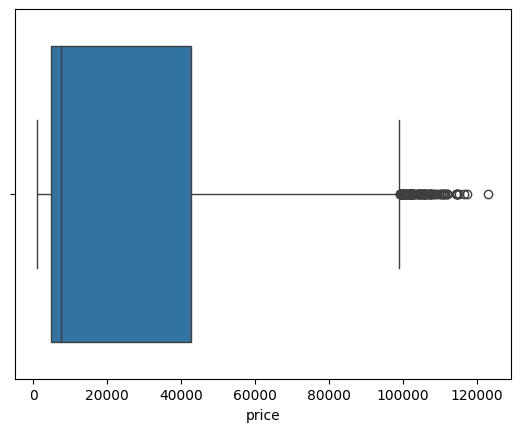

In [ ]:
for col in flight_price_df.columns:
    plt.figure()
    sns.boxplot(x=flight_price_df[col],data=flight_price_df)

In [ ]:
flight_price_df1=flight_price_df[flight_price_df["duration"]<45]

In [ ]:
flight_price_df=flight_price_df[flight_price_df["price"]<110000]

In [ ]:
flight_price_df.shape

(300134, 10)

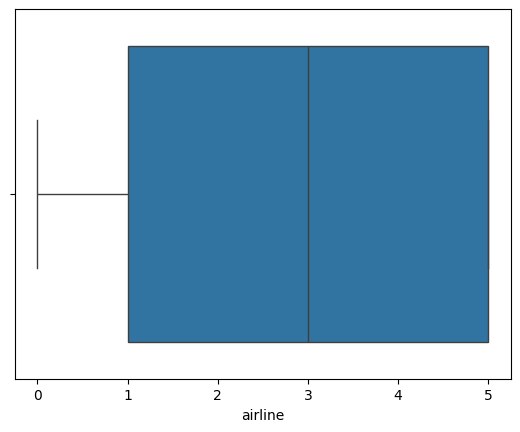

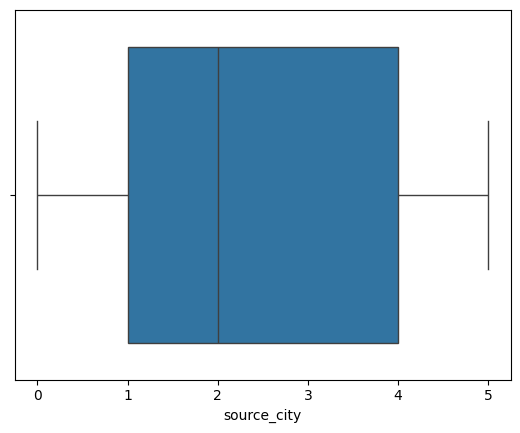

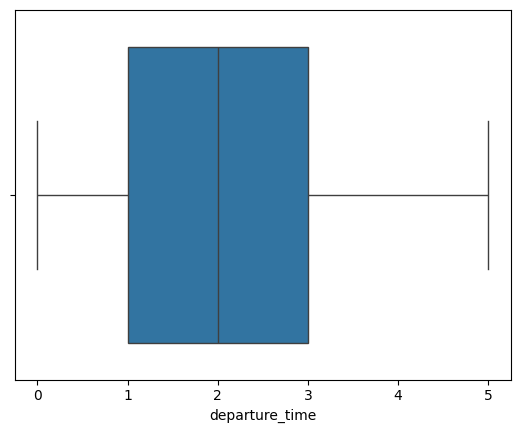

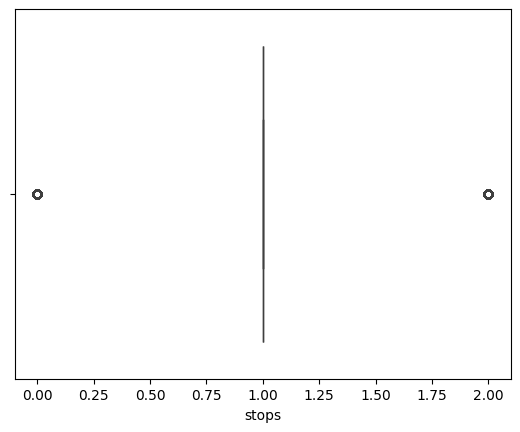

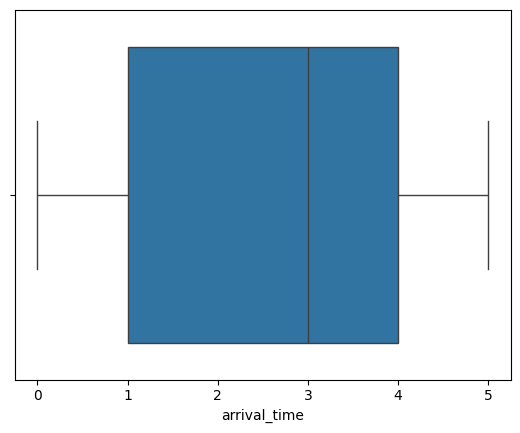

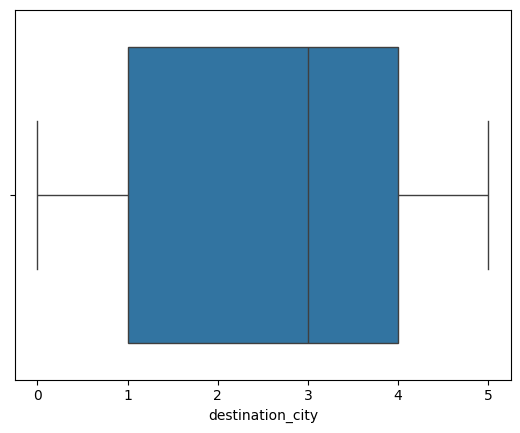

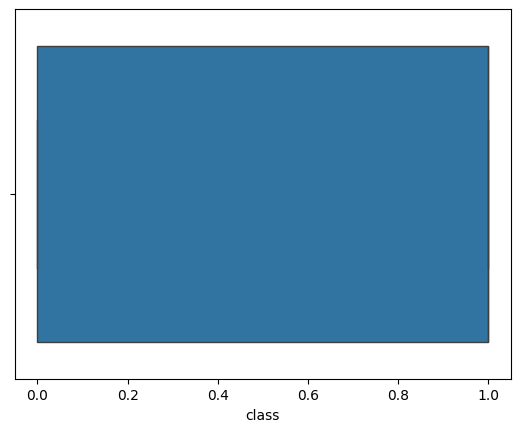

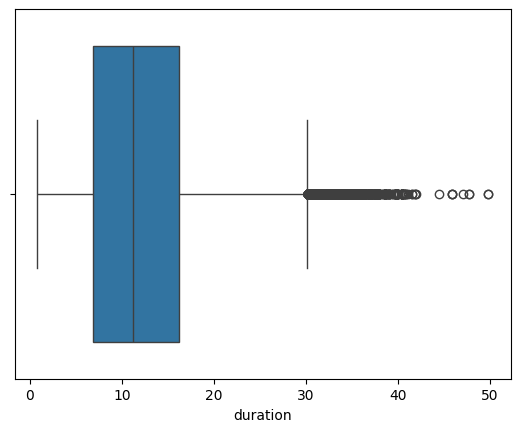

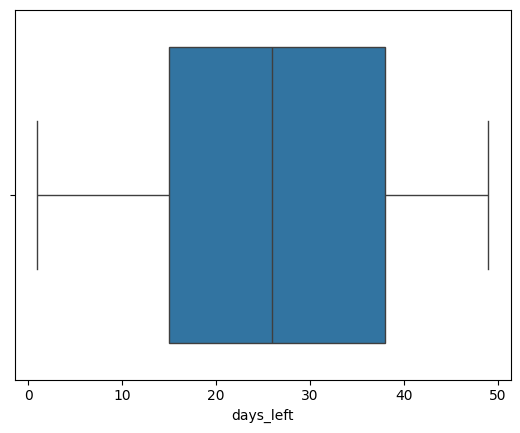

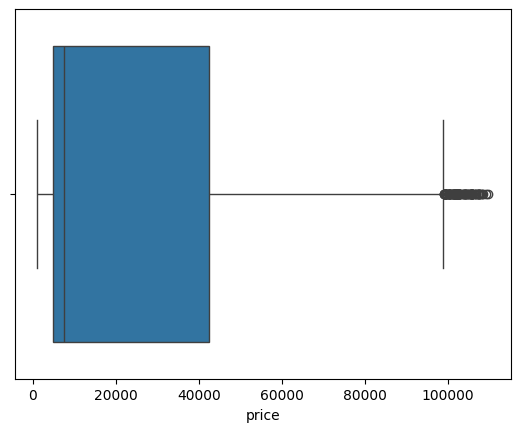

In [ ]:
for col in flight_price_df.columns:
    plt.figure()
    sns.boxplot(x=flight_price_df[col],data=flight_price_df)

In [ ]:
flight_price_df.skew()

airline            -0.211207
source_city        -0.032991
departure_time      0.138933
stops              -0.622752
arrival_time       -0.336960
destination_city   -0.054970
class              -0.814470
duration            0.602946
days_left          -0.035499
price               1.059479
dtype: float64

In [ ]:
flight_price_df.kurt()

airline            -1.592062
source_city        -1.290239
departure_time     -1.278535
stops               2.846520
arrival_time       -0.997089
destination_city   -1.290415
class              -1.336648
duration           -0.268916
days_left          -1.156191
price              -0.407564
dtype: float64

In [ ]:
print('Before outlier removal : ',flight_price_df.shape)
z = np.abs(zscore(flight_price_df, axis = 1))

Before outlier removal :  (300134, 10)


In [ ]:
threshold = 2.9999999
dataset = flight_price_df[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

After Z-Score approach :  (287097, 10)


In [ ]:
X=dataset.drop(['price'],axis=1)
Y=dataset['price']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.80)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(229677, 9)
(57420, 9)
(229677,)
(57420,)


# Linear Regression

In [ ]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_predict_lr_train=lr_model.predict(x_train)
y_predict_lr_test=lr_model.predict(x_test)

In [ ]:
print(r2_score(y_train,y_predict_lr_train))
print("\n")
print(r2_score(y_test,y_predict_lr_test))

0.9098043555813061


0.9106744815163178


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_predict_dt_train=dt_model.predict(x_train)
y_predict_dt_test=dt_model.predict(x_test)
print(r2_score(y_train, y_predict_dt_train))
print("\n")
print(r2_score(y_test, y_predict_dt_test))  

0.9994385805108507


0.98343981572747


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_predict_rf_train = rf_model.predict(x_train)
y_predict_rf_test = rf_model.predict(x_test)
print(r2_score(y_train, y_predict_rf_train))
print("\n")
print(r2_score(y_test, y_predict_rf_test))

0.9981327638866497


0.9893006444987064
